<a href="https://colab.research.google.com/github/ArshockAbedan/ML2021/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras API

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.metrics as metrics


In [ ]:
# The Model
model = models.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(1),
])

In [ ]:
model.compile(
    loss = losses.MeanSquaredError(),
    optimizer = optimizers.SGD(learning_rate=1e-3),
    metrics = [metrics.MeanAbsoluteError()],
)

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Training**

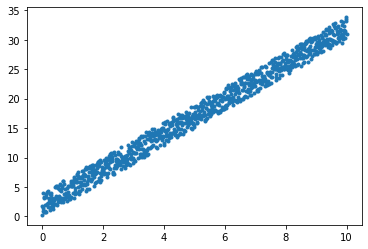

In [ ]:
x_data = np.linspace(0,10,1000)
y_data = 3*x_data + np.random.rand(1000)*4
plt.plot(x_data, y_data, '.')

In [ ]:
model.fit(x=x_data, y=y_data, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
32/32 - 0s - loss: 130.7583 - mean_absolute_error: 8.6858
Epoch 2/10
32/32 - 0s - loss: 3.1663 - mean_absolute_error: 1.4342
Epoch 3/10
32/32 - 0s - loss: 1.7580 - mean_absolute_error: 1.0918
Epoch 4/10
32/32 - 0s - loss: 1.7280 - mean_absolute_error: 1.0864
Epoch 5/10
32/32 - 0s - loss: 1.7133 - mean_absolute_error: 1.0823
Epoch 6/10
32/32 - 0s - loss: 1.7000 - mean_absolute_error: 1.0794
Epoch 7/10
32/32 - 0s - loss: 1.6854 - mean_absolute_error: 1.0750
Epoch 8/10
32/32 - 0s - loss: 1.6740 - mean_absolute_error: 1.0717
Epoch 9/10
32/32 - 0s - loss: 1.6610 - mean_absolute_error: 1.0679
Epoch 10/10
32/32 - 0s - loss: 1.6476 - mean_absolute_error: 1.0646


Prediction

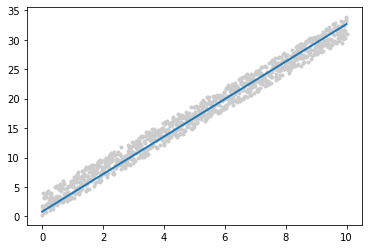

In [ ]:
y_pred = model.predict(x_data)

plt.plot(x_data, y_data, '.', color='#ccc')
plt.plot(x_data, np.squeeze(y_pred), linewidth=2)

Saving and loading the model

In [ ]:
model.save('./model.h5')

In [ ]:
restored_model = models.load_model('./model.h5')
restored_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


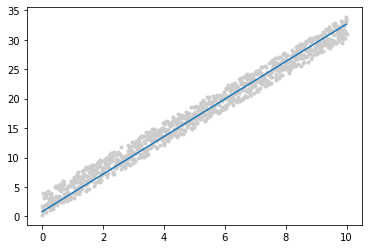

In [ ]:
plt.plot(x_data, y_data, '.', color='#ccc')
plt.plot(x_data, restored_model.predict(x_data).squeeze())